## librerias


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics.cluster import (
    completeness_score,
    homogeneity_score,
    v_measure_score,
)
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

from spektral.datasets.citation import Cora
from spektral.layers.convolutional import GCSConv
from spektral.layers.pooling import MinCutPool
from spektral.utils.convolution import normalized_adjacency
from spektral.utils.sparse import sp_matrix_to_sp_tensor
from spektral.layers import GCNConv, GlobalSumPool

## definicion de funciones


In [37]:

np.random.seed(1)
epochs = 5000  # Training iterations
lr = 5e-4  # Learning rate

## Cargar el dataset

In [38]:
dataset = Cora()
adj, x, y = dataset[0].a, dataset[0].x, dataset[0].y
a_norm = normalized_adjacency(adj)
a_norm = sp_matrix_to_sp_tensor(a_norm)
F = dataset.n_node_features
y = np.argmax(y, axis=-1)
n_clusters = y.max() + 1
n_clusters


D:\Anaconda\envs\CEIEC\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


7

## Modelo

In [40]:
x_in = Input(shape=(F,), name="X_in")
a_in = Input(shape=(None,), name="A_in", sparse=True)

x_1 = GCSConv(16, activation="elu")([x_in, a_in])
x_1, a_1, s_1 = MinCutPool(n_clusters, return_mask=True)([x_1, a_in])

model = Model([x_in, a_in], [x_1, s_1])

model.compile(
    optimizer=keras.optimizers.Adam(lr=lr),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

## Entrenamiento 

In [42]:
# Setup
inputs = [x,a_norm]

# Fit model
_, s_out = model(inputs, training=False)

print(s_out)

tf.Tensor(
[[0.11250496 0.1366036  0.16891873 ... 0.16156904 0.12972954 0.13176192]
 [0.15820648 0.15877043 0.09507975 ... 0.18945155 0.09821917 0.12560439]
 [0.10352358 0.16146643 0.16385336 ... 0.17724645 0.10129012 0.12204337]
 ...
 [0.12992534 0.13925602 0.22709645 ... 0.15299569 0.10905357 0.12763755]
 [0.16235636 0.1591221  0.17369454 ... 0.11071502 0.11823361 0.10140187]
 [0.1428383  0.13826014 0.13200377 ... 0.13218404 0.15865599 0.11854456]], shape=(2708, 7), dtype=float32)


## Visualizacion 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from stellargraph.mapper import GraphSAGENodeGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
node_subject = node_subjects.astype("category").cat.codes

X = node_embeddings
if X.shape[1] > 2:
    transform = TSNE  # PCA

    trans = transform(n_components=2)
    emb_transformed = pd.DataFrame(trans.fit_transform(X), index=node_ids)
    emb_transformed["label"] = node_subject
else:
    emb_transformed = pd.DataFrame(X, index=node_ids)
    emb_transformed = emb_transformed.rename(columns={"0": 0, "1": 1})
    emb_transformed["label"] = node_subject

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["label"].astype("category"),
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for cora dataset".format(transform.__name__)
)
plt.show()

## Imprimir resultados y metricas

Homogeneity: 0.376; Completeness: 0.354; NMI: 0.365


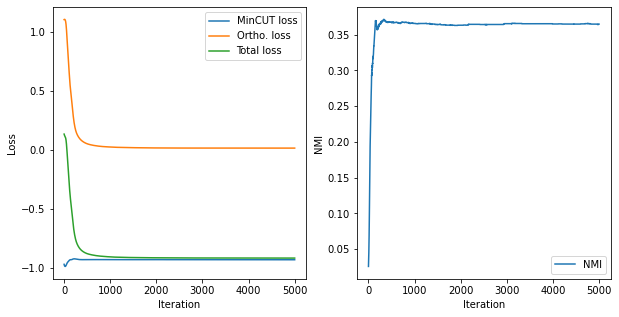

In [7]:
# _, s_out = model(inputs, training=False)
# s_out = np.argmax(s_out, axis=-1)
# hom = homogeneity_score(y, s_out)
# com = completeness_score(y, s_out)
# nmi = v_measure_score(y, s_out)
# print("Homogeneity: {:.3f}; Completeness: {:.3f}; NMI: {:.3f}".format(hom, com, nmi))

# # Plots
# plt.figure(figsize=(10, 5))

# plt.subplot(121)
# plt.plot(loss_history[:, 0], label="MinCUT loss")
# plt.plot(loss_history[:, 1], label="Ortho. loss")
# plt.plot(loss_history[:, 2], label="Total loss")
# plt.legend()
# plt.ylabel("Loss")
# plt.xlabel("Iteration")

# plt.subplot(122)
# plt.plot(nmi_history, label="NMI")
# plt.legend()
# plt.ylabel("NMI")
# plt.xlabel("Iteration")

# plt.show()